In [68]:
print(__doc__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Automatically created module for IPython interactive environment


In [69]:
df = pd.read_csv("csv_dataset/dataframe_features_5 em 5.csv", sep=';')

df = df.drop(columns='Unnamed: 0')

df = df[df.label != 0]
df = df[df.label != 9]
df = df[df.label != 13]
df = df[df.label != 22]
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,label
239,0.194670,3.794735,0.020317,1.263899,1.817211,3.761819,0.240159,0.189803,0.482897,0.415156,0.723056,0.604959,0.140319,0.400751,0.128410,0.375362,0.268729,0.776112,2
240,0.197236,3.762247,0.011024,1.242920,1.798985,3.734972,0.261479,0.186422,0.553467,0.398168,0.814946,0.584590,0.143172,0.420242,0.128953,0.387278,0.272124,0.807520,2
241,0.209274,3.772101,0.012482,1.264805,1.797375,3.736934,0.261479,0.206791,0.553467,0.460336,0.814946,0.667128,0.124586,0.428425,0.113744,0.400128,0.238330,0.828553,2
242,0.214540,3.734495,0.007871,1.284320,1.787795,3.667968,0.257849,0.201169,0.533363,0.439675,0.791212,0.640844,0.141379,0.435768,0.125675,0.407101,0.267054,0.842869,2
243,0.216639,3.739940,0.006521,1.342874,1.724467,3.663524,0.270064,0.188954,0.574788,0.439843,0.844852,0.628796,0.102043,0.456206,0.093370,0.426612,0.195413,0.882818,2


In [70]:
df = df[df.index%5 == 0]
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,label
240,0.197236,3.762247,0.011024,1.242920,1.798985,3.734972,0.261479,0.186422,0.553467,0.398168,0.814946,0.584590,0.143172,0.420242,0.128953,0.387278,0.272124,0.807520,2
245,0.071155,3.773668,0.322784,1.596770,1.464684,3.556011,0.059928,0.112010,0.109850,0.227030,0.169778,0.339040,0.060127,0.666558,0.055618,0.623702,0.115745,1.290260,2
250,0.191525,3.815685,0.352927,1.483332,1.724894,3.592031,0.246977,0.154359,0.521848,0.350949,0.768825,0.505308,0.241753,0.593973,0.229642,0.618952,0.471395,1.212925,2
255,0.178441,3.713463,0.365066,1.580338,1.575342,3.577004,0.250732,0.137587,0.542479,0.326061,0.793211,0.463648,0.147070,0.633730,0.136760,0.610386,0.283830,1.244116,2
260,0.175700,3.709938,0.358829,1.708597,1.511316,3.585503,0.263415,0.130914,0.540968,0.289725,0.804383,0.420639,0.102795,0.624197,0.101671,0.617984,0.204465,1.242181,2


In [71]:
df.shape

(178, 19)

In [83]:
df.label.value_counts()


12    73
21    56
2     49
Name: label, dtype: int64

In [73]:
X = df.loc[:,['feat_1','feat_4']]
#X = X.iloc[:, :2]
X = X.to_numpy()
#X = X.astype('float64')

X

array([[0.19723578, 1.24291952],
       [0.07115511, 1.59677024],
       [0.19152478, 1.483332  ],
       [0.17844125, 1.58033752],
       [0.17569963, 1.70859733],
       [0.15254553, 1.71519665],
       [0.16561746, 1.47933445],
       [0.12544614, 1.44249286],
       [0.15728426, 1.67629145],
       [0.20957221, 1.37380483],
       [0.19350506, 1.38556289],
       [0.18678697, 1.56807191],
       [0.19292501, 1.72027225],
       [0.16473699, 1.68625766],
       [0.16842929, 1.46505932],
       [0.14000218, 1.71174772],
       [0.19910738, 1.29196837],
       [0.19466009, 1.59614194],
       [0.18776742, 1.32821273],
       [0.18096249, 1.62113319],
       [0.17117986, 1.59603196],
       [0.15442479, 1.73816996],
       [0.16705009, 1.80249083],
       [0.23077954, 1.5566625 ],
       [0.21683319, 1.38492312],
       [0.19071824, 1.6785919 ],
       [0.18602763, 1.36899391],
       [0.17610691, 1.29679783],
       [0.16771647, 1.39041013],
       [0.06966325, 1.56658782],
       [0.

In [74]:
y = df['label']
y = y.to_numpy()
y = y.astype('int64')
y
y.shape

(178,)

In [62]:
#n_neighbors = 15
#
## import some data to play with
#iris = datasets.load_iris()
#
## we only take the first two features. We could avoid this ugly
## slicing by using a two-dim dataset
#X = iris.data[:, :2]
#y = iris.target
#type(y[1])

numpy.int64

In [63]:
#print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
#print(X)
#print(y)

In [81]:
h = .02  # step size in the mesh
n_neighbors = 25

In [76]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

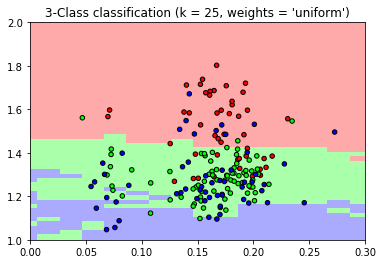

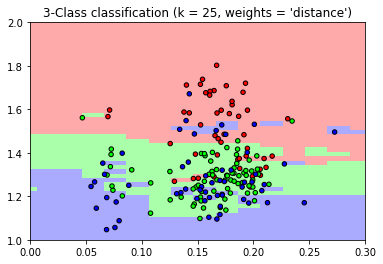

In [82]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 # print(xx)
 # print(yy)
 # print(xx.ravel())
 # print(yy.ravel())
 # print(np.c_[xx.ravel(), yy.ravel()])
 # test = np.c_[xx.ravel(), yy.ravel()]
 # print(len(test[0:895]))
 # Z = clf.predict(test[0:895])
    
   # print(xx.shape)
    #print(Z)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(0, 0.3)
    plt.ylim(1, 2)
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))


In [66]:
plt.show()